### Projeto da Matéria de Aprendizado não Supervisionado do curso de Pós Graduação em Data Science da FURB

O objetivo do trabalho é utilizar imagens de faces disponibilizadas no dataset ORL2 junto a imagens de faces de uma nova pessoa e aplicar a técnica PCA para realizar a redução de dimensionalidade e treinar um classificador para indentificar corretamente a pessoa.

Para o desenvolvimento do trabalho foi utilizada a linguagem Python e as bibliotecas numpy, pandas, sklearn e opencv.

Para o trabalho, além das imagens da base de dados ORL disponibilizadas em aula, foram adicionadas 10 imagens da atriz Maggie Smith. Para fazer o pré processamento as imagens foram transformadas em tons de cinza, a detecção facial da atriz foi feita através do classificador haarcascade do OpenCV e por fim, as imagens das faces foram redimensionadas para o tamanho 70x80.

As imagens originais estão disponíveis na pasta "Maggie Smith - Originais", enquanto que as imagens pré processadas são disponibilizadas na pasta ORL2, junto as demais.

Foi utilizado a técnica de regressão logística para criar um classificador para identificar as pessoas com base no resultado do PCA. O dataset foi dividido utilizando holdout com 70% dos dados para treino e 30% para teste, estratificando a divisão pela pessoa. A métrica utilizada para a avaliação foi acurácia. O PCA foi aplicado somente sobre os dados de treino para não enviesar o experimento. O experimento foi executado variando o número de componentes principais entre 10 e 20, obtendo-se os seguintes resultados:

- 10 componentes principais, acurácia: 93.50%.
- 11 componentes principais, acurácia: 93.50%.
- 12 componentes principais, acurácia: 93.50%.
- 13 componentes principais, acurácia: 95.12%.
- 14 componentes principais, acurácia: 95.12%.
- 15 componentes principais, acurácia: 95.93%.
- 16 componentes principais, acurácia: 95.93%.
- 17 componentes principais, acurácia: 96.75%.
- 18 componentes principais, acurácia: 96.75%.
- 19 componentes principais, acurácia: 95.93%.
- 20 componentes principais, acurácia: 97.56%.

Por fim, é montado um classificador com o número de componentes que obteve a maior acurácia para avaliar os erros do modelo.

Para reproduzir os resultados, basta abrir o projeto no google colab, criar as pastas "Maggie Smith - Originais" e "ORL2" e fazer os uploads de seus respectivos conteúdos, e executar o notebook.

In [11]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pré-processamento das faces

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

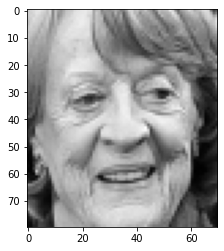

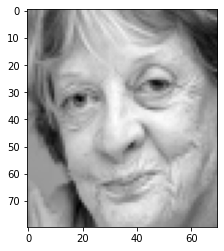

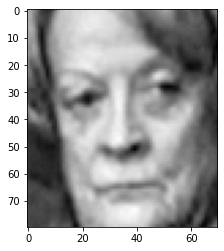

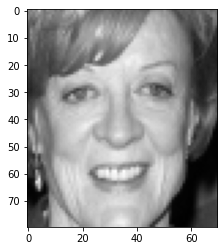

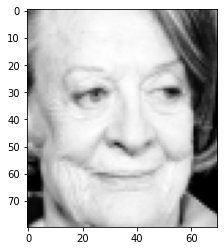

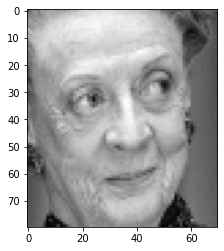

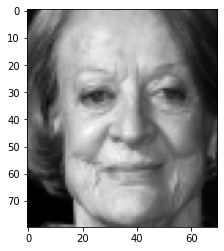

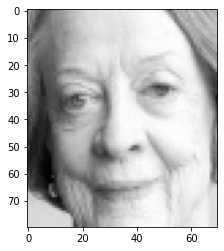

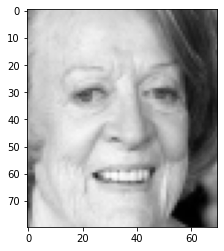

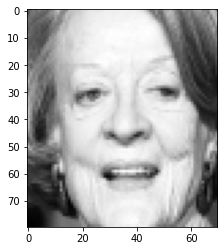

In [5]:
face_index = np.zeros(10, dtype=int)
face_index[6] = 1
face_index[8] = 2

for i in range(1,11):
  filename = '4'+'{}'.format(i).zfill(2)+'_41.jpg'
  image = cv2.imread('Maggie Smith - Originais/{}'.format(filename), cv2.IMREAD_GRAYSCALE)
  faces = face_cascade.detectMultiScale(image, 1.1, 4)
  index = face_index[i-1]
  
  for (x, y, w, h) in faces[index:index+1]:
    image = image[y:y+h, x:x+w]
    image = cv2.resize(image, (70, 80), interpolation=cv2.INTER_AREA)

  cv2.imwrite('ORL2/{}'.format(filename), image)
  plt.imshow(image, cmap='gray')
  plt.show()

# Preparação dos dados

In [6]:
# lista com os arquivos do diretório
files = os.listdir('ORL2')

# (quantidade de fotos, largura * altura)
x = np.zeros((len(files), 80*70))
# (quantidade de faces)
y = np.zeros(len(files))

# lê as imagens em tons de cinza e prepara as matrizes x e y
for i, file in enumerate(files):
  img = cv2.imread('ORL2/{}'.format(file), cv2.IMREAD_GRAYSCALE)
  x[i] = img.flatten()
  y[i] = file.split('_')[1].replace('.jpg', '')

In [7]:
# checagem do tamanho das matrizes
x.shape, y.shape

((410, 5600), (410,))

# Visualização das imagens com 2 componentes

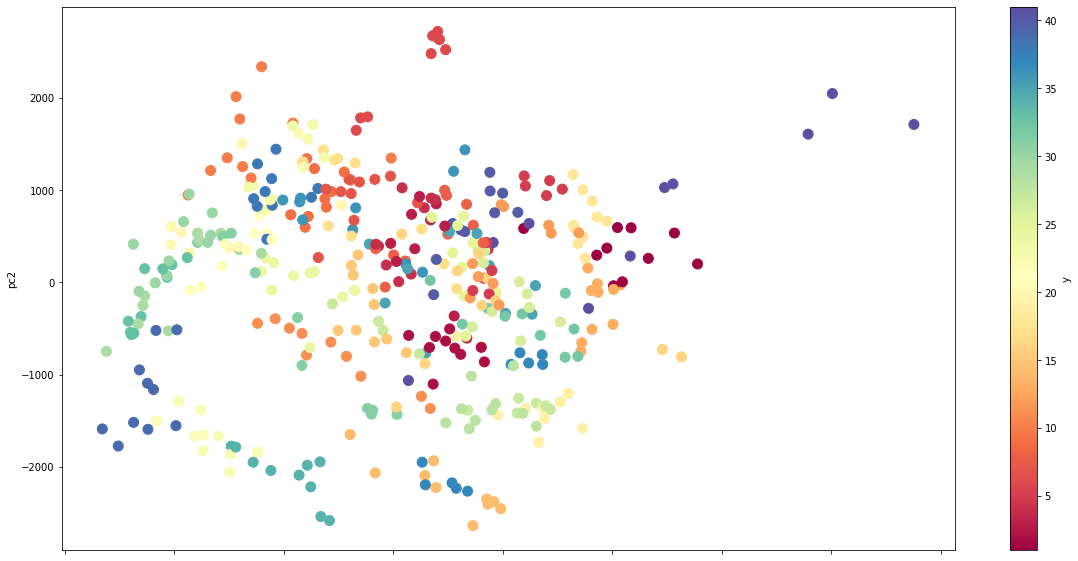

In [10]:
# redução de dimensionalidade com PCA
pca = PCA(n_components=2)
data = pca.fit_transform(x)

# gráfico de dispersão 2D 
cmap = cm.get_cmap('Spectral') 
df = pd.DataFrame({'pc1': data[:,0], 'pc2': data[:,1], 'y': y})
df.plot.scatter(x='pc1', y='pc2', c='y', s=100, cmap=cmap, figsize=(20,10))

# Experimento

In [13]:
import warnings

# ignora os warnings para não poluir os resultados do experimento
warnings.filterwarnings('ignore')

In [14]:
# holdout 70/30 estratificado pela pessoa
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y)

# variação do número de componentes na execução do PCA
for c in range(10, 21):
  pca = PCA(n_components = c)
  # faz o fit somente nos dados de treino para não enviesar o experimento
  train_pc = pca.fit_transform(x_train)
  # transforma os dados de teste
  test_pc = pca.transform(x_test)

  # foi escolhido o método de regressão logística, sem otimizaçao de parâmetros
  # para representar o problema de classificação
  lr = LogisticRegression()
  lr.fit(train_pc, y_train)
  y_pred = lr.predict(test_pc)

  # avaliação dos resultados
  acc = accuracy_score(y_test, y_pred) * 100
  print('%d componentes principais, acurácia: %.2f%%.' % (c, acc))

10 componentes principais, acurácia: 93.50%.
11 componentes principais, acurácia: 93.50%.
12 componentes principais, acurácia: 93.50%.
13 componentes principais, acurácia: 95.12%.
14 componentes principais, acurácia: 95.12%.
15 componentes principais, acurácia: 95.93%.
16 componentes principais, acurácia: 95.93%.
17 componentes principais, acurácia: 96.75%.
18 componentes principais, acurácia: 96.75%.
19 componentes principais, acurácia: 95.93%.
20 componentes principais, acurácia: 97.56%.


# Análise dos erros

In [17]:
# preparamos os dados com o melhor número de componentes obtido no experimento
pca = PCA(n_components=20)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

# treinamos o classificador com o melhor número de componentes
lr = LogisticRegression()
lr.fit(pca_train, y_train)

# fazemos a predição e separamos as imagens classificadas incorretamente 
y_pred = lr.predict(pca_test)
mask = y_test != y_pred

número de pessoas que tiveram a face incorretamente identificada: 3
quantidade de faces incorretamente identificadas: 3


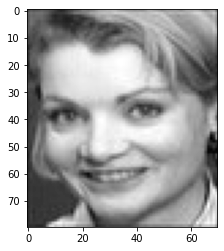

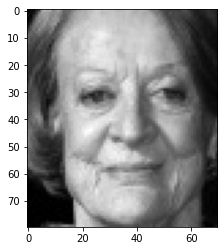

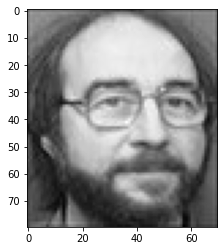

In [29]:
print('número de pessoas que tiveram a face incorretamente identificada:', np.unique(y_test[mask]).shape[0])
print('quantidade de faces incorretamente identificadas:', y_test[mask].shape[0])

incorrect_faces = x_test[mask].reshape(-1, 80, 70)
for i in range(incorrect_faces.shape[0]):
  plt.imshow(incorrect_faces[i], cmap='gray')
  plt.show()